In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objs as go

from PIL import Image

In [3]:
df_dc_electr_90s = pd.read_csv("data/discogs_electr_90s_clean.csv")
#df_discogs = pd.read_csv("data/discogs_clean.csv")
#df_music_sales = pd.read_csv("data/music_sales_clean.csv")

In [4]:
df_dc_electr_90s

artist                                         title  \
0          Julian Jonah                       It's A Jungle Out There   
1          Soul II Soul                  Vol II - 1990 - A New Decade   
2                  INXS                                  Bitter Tears   
3      Cabaret Voltaire                                     Easy Life   
4         Musto & Bones                   Dangerous On The Dancefloor   
...                 ...                                           ...   
31244    Madison Avenue                          Who The Hell Are You   
31245   Sylvester Burns                                    Been There   
31246        Snoop Dogg                                 Ridaz With Me   
31247           Orishas                                   A Lo Cubano   
31248               98°  Give Me Just One Night (Una Noche) (Remixes)   

                   label country format       genre  \
0              Chrysalis      US  Vinyl  Electronic   
1                 Virgin      US     CD  Electronic   
2               Atlantic      US     CD  Electronic   
3             Parlophone      UK  Vinyl  Electronic   
4              City Beat      UK  Vinyl  Electronic   
...                  ...     ...    ...         ...   
31244         Dance Pool   Italy  Vinyl  Electronic   
31245   Teardrop Records      UK  Vinyl  Electronic   
31246        TVT Records      US  Vinyl     Hip Hop   
31247  Dance Factory (2)   Italy  Vinyl  Electronic   
31248  Universal Records      US  Vinyl  Electronic   

                             styles  have  want  num_ratings  \
0                             House   208   178           28   
1      Downtempo,Neo Soul,RnB/Swing    65    35            8   
2       Progressive House,Synth-pop   221    54           27   
3                Techno,House,Bleep   421   722           61   
4         Downtempo,Hip-House,House   159    69           24   
...                             ...   ...   ...          ...   
31244                         House   170    60           17   
31245                         House    42     7            5   
31246                       Gangsta   108    25            7   
31247                 Latin,Pop Rap   113   150           11   
31248                         House    59    20            1   

       lowest_price_(USD)  median price_(USD)  highest_price_(USD)  \
0                    1.09                3.48                 7.61   
1                    1.50                2.81                 3.00   
2                    0.47                6.12                19.95   
3                   12.35               30.40                59.78   
4                    1.09                3.36                 9.86   
...                   ...                 ...                  ...   
31244                0.50                3.20                13.04   
31245                0.25                1.00                 6.99   
31246                0.61                1.62                 5.13   
31247                3.80                7.61                18.48   
31248                0.50                1.99                10.01   

       mean_rating  release_year  
0             4.61          1990  
1             4.75          1990  
2             3.85          1990  
3             4.33          1990  
4             4.50          1990  
...            ...           ...  
31244         3.88          2000  
31245         3.60          2000  
31246         4.00          2000  
31247         4.91          2000  
31248         5.00          2000  

[31249 rows x 15 columns]

In [6]:
from plotly.express import bar
for column in ['label', 'country', 'format', 'genre', 'styles']:
    bar(data_frame=df_dc_electr_90s[column].value_counts().to_frame().reset_index().head(n=50), x=column, y='count').show()

In [52]:


df_dc_electr_90s.columns

Index(['artist', 'title', 'label', 'country', 'format', 'genre', 'styles',
       'have', 'want', 'num_ratings', 'lowest_price_(USD)',
       'median price_(USD)', 'highest_price_(USD)', 'mean_rating',
       'release_year'],
      dtype='object')

In [73]:
df_dc_electr_90s['styles'].unique()

array(['House', 'Downtempo,Neo Soul,RnB/Swing',
       'Progressive House,Synth-pop', ...,
       'RnB/Swing,House,UK Garage,Acid Jazz', 'RnB/Swing,House,Latin',
       'House,UK Garage,Disco'], dtype=object)

In [53]:
fig2 = px.scatter(df_dc_electr_90s,
                  x='mean_rating',
                  y='median price_(USD)',
                  animation_frame='release_year',
                  animation_group='styles',
                  size='highest_price_(USD)',
                  color='genre',
                  color_discrete_sequence = px.colors.qualitative.G10,
                  log_x=True,
                  size_max=55, range_x=[100,100000], range_y=[25,90],
                  title="average_rating vs. median_price over Time")

# Update layout
fig2.update_layout(title_x=0.3, margin=dict(t=40))

fig2

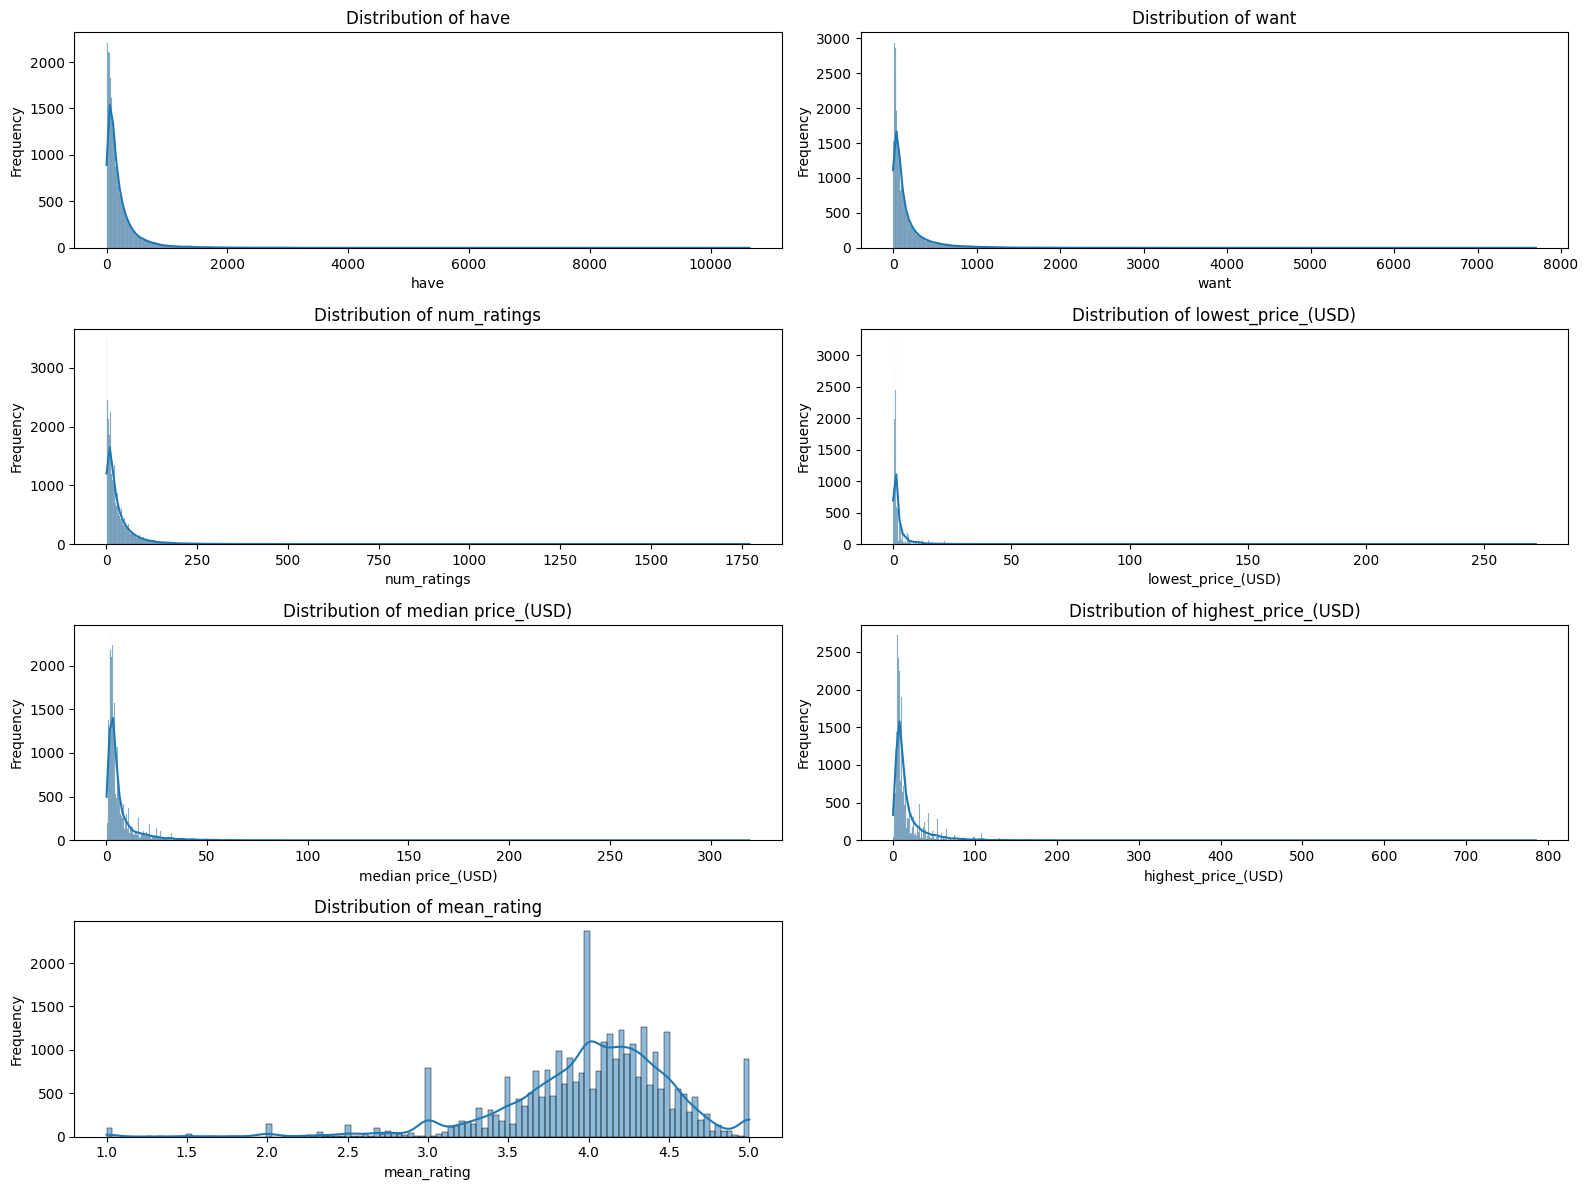

have          want   num_ratings  lowest_price_(USD)  \
count  31249.000000  31249.000000  31249.000000        31249.000000   
mean     226.529489    166.521297     35.153445            2.612199   
std      342.521433    275.890522     56.866231            5.111492   
min        0.000000      0.000000      1.000000            0.000000   
25%       56.000000     31.000000      7.000000            0.620000   
50%      124.000000     75.000000     18.000000            1.090000   
75%      266.000000    187.000000     42.000000            2.490000   
max    10643.000000   7699.000000   1771.000000          271.740000   

       median price_(USD)  highest_price_(USD)   mean_rating  
count        31249.000000         31249.000000  31249.000000  
mean             7.211149            18.229361      4.010739  
std             10.584579            24.166109      0.524314  
min              0.190000             0.190000      1.000000  
25%              2.320000             6.520000      3.770000  
50%              3.750000            10.140000      4.070000  
75%              7.400000            19.990000      4.330000  
max            319.290000           784.920000      5.000000

In [12]:
# Summary statistics
summary_stats = df_dc_electr_90s[['have', 'want', 'num_ratings', 'lowest_price_(USD)', 
                    'median price_(USD)', 'highest_price_(USD)', 'mean_rating']].describe()

# Plot distributions
plt.figure(figsize=(16, 12))

# Plot each distribution
for i, column in enumerate(['have', 'want', 'num_ratings', 'lowest_price_(USD)', 
                            'median price_(USD)', 'highest_price_(USD)', 'mean_rating']):
    plt.subplot(4, 2, i+1)
    sns.histplot(df_dc_electr_90s[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

summary_stats

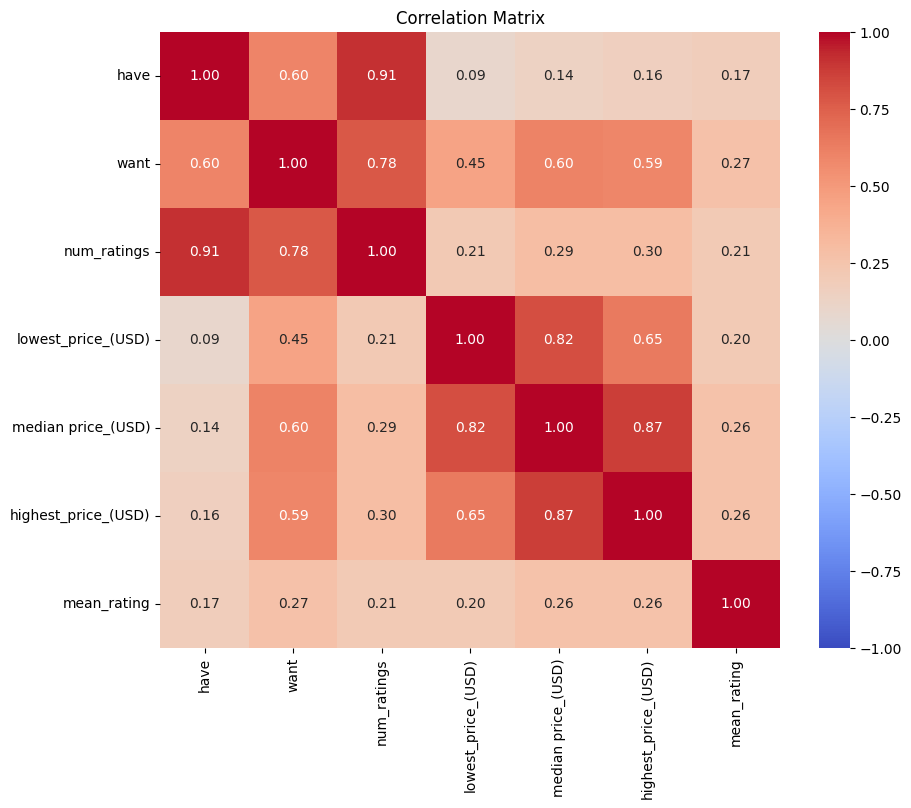

have      want  num_ratings  lowest_price_(USD)  \
have                 1.000000  0.598080     0.907703            0.090977   
want                 0.598080  1.000000     0.776341            0.451278   
num_ratings          0.907703  0.776341     1.000000            0.212005   
lowest_price_(USD)   0.090977  0.451278     0.212005            1.000000   
median price_(USD)   0.137127  0.603593     0.292100            0.820301   
highest_price_(USD)  0.157443  0.589121     0.296721            0.646833   
mean_rating          0.173077  0.273051     0.207130            0.203925   

                     median price_(USD)  highest_price_(USD)  mean_rating  
have                           0.137127             0.157443     0.173077  
want                           0.603593             0.589121     0.273051  
num_ratings                    0.292100             0.296721     0.207130  
lowest_price_(USD)             0.820301             0.646833     0.203925  
median price_(USD)             1.000000             0.872532     0.263521  
highest_price_(USD)            0.872532             1.000000     0.260928  
mean_rating                    0.263521             0.260928     1.000000

In [8]:
# Calculate the correlation matrix for the selected columns
correlation_matrix = df_dc_electr_90s[['have', 'want', 'num_ratings', 'lowest_price_(USD)', 
                         'median price_(USD)', 'highest_price_(USD)', 'mean_rating']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [9]:
# Scatter matrix for relationships between 'have', 'want', 'num_ratings', 'lowest_price_(USD)',
# 'median price_(USD)', 'highest_price_(USD)', and 'mean_rating'
scatter_matrix_fig = px.scatter_matrix(df_dc_electr_90s, dimensions=['have', 'want', 'num_ratings', 
                                                        'lowest_price_(USD)', 'median price_(USD)', 
                                                        'highest_price_(USD)', 'mean_rating'],
                                       color='mean_rating', title="Scatter Matrix of Selected Columns",
                                       labels={'have': 'Have', 'want': 'Want', 'num_ratings': 'Num Ratings',
                                               'lowest_price_(USD)': 'Lowest Price (USD)',
                                               'median price_(USD)': 'Median Price (USD)',
                                               'highest_price_(USD)': 'Highest Price (USD)',
                                               'mean_rating': 'Mean Rating'},
                                       color_continuous_scale='Viridis')

# Correlation heatmap
heatmap_fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='Viridis'))

heatmap_fig.update_layout(title="Correlation Heatmap", xaxis_title="Features", yaxis_title="Features")

scatter_matrix_fig.show()
heatmap_fig.show()

In [10]:
# Plot histograms using plotly express
fig_histograms = go.Figure()

# Columns to plot
columns = ['have', 'want', 'num_ratings', 'lowest_price_(USD)', 
           'median price_(USD)', 'highest_price_(USD)', 'mean_rating']

# Create subplots for each column
for column in columns:
    fig_histograms.add_trace(go.Histogram(x=df_dc_electr_90s[column], name=column, opacity=0.75))

# Update layout
fig_histograms.update_layout(
    title_text='Distributions of Have, Want, Num Ratings, Prices, and Ratings',
    barmode='overlay',
    xaxis_title_text='Value',
    yaxis_title_text='Frequency',
    bargap=0.2
)

# Plot correlation matrix using plotly express
fig_corr_matrix = px.imshow(correlation_matrix,
                            text_auto=True,
                            color_continuous_scale='RdBu_r',
                            title='Correlation Matrix')

# Display the visualizations
fig_histograms.show()
fig_corr_matrix.show()

In [75]:
# First, split the 'styles' column into a list of styles for each row
df_dc_electr_90s_styles = df_dc_electr_90s

df_dc_electr_90s_styles['styles'] = df_dc_electr_90s_styles['styles'].str.split(',')

# Then, explode the DataFrame to have one row per style
df_dc_electr_90s_exploded = df_dc_electr_90s_styles.explode('styles')

# Remove any leading/trailing whitespace from the styles
df_dc_electr_90s_exploded['styles'] = df_dc_electr_90s_exploded['styles'].str.strip()

In [76]:
# Count the number of releases for each style
top_40_styles = df_dc_electr_90s_exploded['styles'].value_counts().nlargest(40).index

# Filter the DataFrame to include only the top 40 styles
df_top_40_styles = df_dc_electr_90s_exploded[df_dc_electr_90s_exploded['styles'].isin(top_40_styles)]

In [77]:
# Group the filtered data by 'styles' and 'format', and count the occurrences
df_style_format_counts = df_top_40_styles.groupby(['styles', 'format']).size().reset_index(name='count')

# Create the bar chart using Plotly Express
fig = px.bar(df_style_format_counts, 
             x='styles', 
             y='count', 
             color='format',  # Different colors for each format
             title='Top 40 Styles vs. Formats (1990-2000)',
             labels={'styles': 'Styles', 'count': 'Number of Releases', 'format': 'Format'},
             height=600)

# Update the layout to make the x-axis labels readable
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [78]:
# Create the heatmap using Plotly Express
fig = px.density_heatmap(df_style_format_counts, 
                         x='styles', 
                         y='format', 
                         z='count',  # Intensity is based on the count
                         title='Heatmap of Top 40 Styles vs. Formats (1990-2000)',
                         labels={'styles': 'Styles', 'format': 'Format', 'count': 'Number of Releases'},
                         height=600)

# Update the layout to make the x-axis labels readable
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [79]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df_top_40_styles, 
                 x='styles', 
                 y='format', 
                 size='num_ratings',  # Optional: size of points based on number of ratings
                 color='mean_rating',  # Optional: color points based on the mean rating
                 title='Scatter Plot of Top 40 Styles vs. Formats (1990-2000)',
                 labels={'styles': 'Styles', 'format': 'Format'},
                 height=600)

# Update the layout to make the x-axis labels readable
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [72]:
# Group the filtered data by 'styles' and 'format', and count the occurrences
df_style_format_counts = df_top_40_styles.groupby(['styles', 'format']).size().reset_index(name='count')

# Create the bar chart using Plotly Express
fig = px.bar(df_style_format_counts, 
             x='styles', 
             y='count', 
             color='format',  # Different colors for each format
             title='Top 40 Styles vs. Formats (1990-2000)',
             labels={'styles': 'Styles', 'count': 'Number of Releases', 'format': 'Format'},
             height=600)

# Update the layout to make the x-axis labels readable
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [70]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df_top_40_styles, 
                 x='styles', 
                 y='format', 
                 size='num_ratings',  # Optional: size of points based on number of ratings
                 color='mean_rating',  # Optional: color points based on the mean rating
                 title='Scatter Plot of Top 40 Styles vs. Formats (1990-2000)',
                 labels={'styles': 'Styles', 'format': 'Format'},
                 height=600)

# Update the layout to make the x-axis labels readable
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [68]:
top_40_styles = df_dc_electr_90s['styles'].value_counts().nlargest(40).index

# Filter the DataFrame to include only the top 40 styles
df_top_40_styles = df_dc_electr_90s[df_dc_electr_90s['styles'].isin(top_40_styles)]

In [27]:
df_music_sales

Format            Metric  Year        value
0         Other Tapes             Value  1973    15.600000
1               LP/EP             Value  1973  1246.000000
2            Cassette             Units  1973    15.000000
3           8 - Track             Value  1973   489.000000
4         Other Tapes  Value (Adjusted)  1973    89.825432
...               ...               ...   ...          ...
1346  Download Single             Units  2019   335.339194
1347            LP/EP             Units  2019    19.103163
1348     Vinyl Single             Units  2019     0.336120
1349        CD Single             Units  2019     0.026257
1350               CD             Units  2019    46.506496

[1351 rows x 4 columns]

In [26]:
df_music_sales.rename(columns={'Value (Actual)': 'value'}, inplace=True)

In [31]:
negative_values = df_music_sales['value'] < 0
negative_rows = df_music_sales[negative_values]
print(negative_rows)

               Format            Metric  Year     value
241         CD Single             Value  1989 -0.700000
247         CD Single             Units  1989 -0.100000
248         CD Single  Value (Adjusted)  1989 -1.443225
511   Cassette Single             Units  2001 -1.500000
525   Cassette Single  Value (Adjusted)  2001 -7.650944
528   Cassette Single             Value  2001 -5.300000
541   Cassette Single             Value  2002 -1.600000
550   Cassette Single             Units  2002 -0.500000
553   Cassette Single  Value (Adjusted)  2002 -2.273770
1024        DVD Audio             Units  2013 -0.054735
1031        DVD Audio             Value  2013 -0.495804
1046        DVD Audio  Value (Adjusted)  2013 -0.544117


In [33]:
df_music_sales= df_music_sales.dropna()
df_music_sales['value'] = df_music_sales['value'].apply(func=lambda x: 0 if x < 0 else x)
df_music_sales.head()

Format            Metric  Year        value
0  Other Tapes             Value  1973    15.600000
1        LP/EP             Value  1973  1246.000000
2     Cassette             Units  1973    15.000000
3    8 - Track             Value  1973   489.000000
4  Other Tapes  Value (Adjusted)  1973    89.825432

In [34]:
df_music_sales.dtypes

Format     object
Metric     object
Year        int64
value     float64
dtype: object

In [11]:
df_music_sales['Format'].unique()

array(['Other Tapes', 'LP/EP', 'Cassette', '8 - Track', 'Vinyl Single',
       'CD', 'Cassette Single', 'CD Single', 'Music Video (Physical)',
       'DVD Audio', 'SACD', 'Download Single',
       'SoundExchange Distributions', 'Download Album',
       'Paid Subscriptions', 'Ringtones & Ringbacks', 'Kiosk',
       'Paid Subscription', 'Download Music Video', 'Synchronization',
       'On-Demand Streaming (Ad-Supported)', 'Other Digital',
       'Other Ad-Supported Streaming', 'Limited Tier Paid Subscription'],
      dtype=object)

In [43]:
from plotly.express import histogram
from plotly.colors import qualitative
histogram(data_frame=df_music_sales[df_music_sales['Metric'] == 'Units'], x='Year', y='value', color='Format',
          color_discrete_sequence=qualitative.Alphabet, height=600, nbins=df_music_sales['Year'].nunique(), ).show()
histogram(data_frame=df_music_sales[df_music_sales['Metric'] != 'Units'], x='Year', y='value', color='Format', facet_row = 'Metric',
          color_discrete_sequence=qualitative.Alphabet, height=1200, nbins=df_music_sales['Year'].nunique(), ).show()

In [47]:
from plotly.express import scatter
for metric in ['Units', 'Value (Adjusted)']:
    scatter(data_frame=df_music_sales[df_music_sales['Metric'] == metric], x='Year', y='Format', color='value', size='value').show()

In [12]:
df_discogs

artist  \
0                                    Red Foley   
1         Tex Williams And His Western Caravan   
2                          The Andrews Sisters   
3              Johnny Vadnal And His Orchestra   
4                                Frank Sinatra   
...                                        ...   
11641474                             Powerwolf   
11641475                             Qeddeshet   
11641476                  Sleeping With Sirens   
11641477                         Mephistofeles   
11641478                           Clara Engel   

                                                      title  \
0                       I Won't Be Home / Dear Little Girls   
1                                                    Polka!   
2                The Wedding Samba / I See, I See = Asi Asi   
3                         The Baseball Polka / Polka Recipe   
4                              Senorita / If I Steal A Kiss   
...                                                     ...   
11641474                                        Interludium   
11641475                                            Way Out   
11641476  If You Were A Movie, This Would Be Your Soundt...   
11641477                                    Violent Theatre   
11641478                           Hatching Under The Stars   

                                           label    country   format  \
0                                          Decca         US  Shellac   
1                                Capitol Records         US    Vinyl   
2                                          Decca         US  Shellac   
3                                     RCA Victor         US  Shellac   
4                                       Columbia  Australia  Shellac   
...                                          ...        ...      ...   
11641474                          Napalm Records     Europe       CD   
11641475  Not On Label (Qeddeshet Self-released)      Japan     File   
11641476                        Rise Records (3)         US    Vinyl   
11641477                          Regain Records     Sweden    Vinyl   
11641478                                oscarson    Germany    Vinyl   

                           genre            styles  release_id  artist_id  \
0                            Pop           Country    10062059     439533   
1         Folk, World, & Country           Country     6072172     899033   
2                          Latin             Vocal    25174888     299951   
3                            Pop             Polka    10916559    1308713   
4                           Jazz             Vocal    11946636      52833   
...                          ...               ...         ...        ...   
11641474                    Rock       Power Metal    26669495     816855   
11641475                    Rock       Death Metal    26704481   10793125   
11641476                    Rock  Alternative Rock    26565155    2217424   
11641477                    Rock       Stoner Rock    26051551    5140571   
11641478  Folk, World, & Country              Folk    26051335    1418599   

           label_id  release_year  
0            5320.0          1950  
1             654.0          1950  
2            5320.0          1950  
3           11358.0          1950  
4            1866.0          1950  
...             ...           ...  
11641474    33182.0          2023  
11641475  2629684.0          2023  
11641476   165412.0          2023  
11641477    21049.0          2023  
11641478   541804.0          2023  

[11641479 rows x 11 columns]

In [57]:
df_discogs['genre'].unique()

array(['Pop', 'Folk, World, & Country', 'Latin', 'Jazz', 'Classical',
       'Blues', 'Brass & Military', 'Funk / Soul', "Children's",
       'Stage & Screen', 'Rock', 'Non-Music', 'Reggae', 'Electronic',
       'Hip Hop'], dtype=object)

In [55]:
from plotly.express import bar 
for column in ['country', 'format', 'genre']: 
    bar(data_frame=df_discogs[column].value_counts().to_frame().reset_index().head(n=50), x=column, y='count').show()

In [58]:
df_electronic = df_discogs[df_discogs['genre'] == 'Electronic']


df_yearly_counts = df_electronic.groupby('release_year').size().reset_index(name='count')


fig = px.line(df_yearly_counts, x='release_year', y='count', 
              title='Number of Electronic Releases by Year',
              labels={'release_year': 'Release Year', 'count': 'Number of Releases'})


fig.show()

In [61]:

df_genre_yearly_counts = df_discogs.groupby(['release_year', 'genre']).size().reset_index(name='count')


fig = px.line(df_genre_yearly_counts, 
              x='release_year', 
              y='count', 
              color='genre',  
              title='Number of Releases by Genre and Year',
              labels={'release_year': 'Release Year', 'count': 'Number of Releases', 'genre': 'Genre'}, height=900)

fig.update_traces(selector=dict(name='Electronic'), line=dict(width=6))

# Show the plot
fig.show()

In [62]:
df_label_counts = df_discogs.groupby(['release_year', 'genre'])['label_id'].nunique().reset_index(name='unique_labels')


fig = px.line(df_label_counts, 
              x='release_year', 
              y='unique_labels', 
              color='genre',  # This will create a line for each genre
              title='Number of Labels Issuing Releases by Genre and Year',
              labels={'release_year': 'Release Year', 'unique_labels': 'Number of Labels', 'genre': 'Genre'},
              height=600)  # Adjust the height of the plot


fig.update_traces(selector=dict(name='Electronic'), line=dict(width=4))


fig.show()

In [7]:
cheapest_release = df_dc_electr_90s.loc[df_dc_electr_90s['lowest_price_(USD)'].idxmin()]
most_expensive_release = df_dc_electr_90s.loc[df_dc_electr_90s['highest_price_(USD)'].idxmax()]

cheapest_release_info = {
    "Artist": cheapest_release['artist'],
    "Title": cheapest_release['title'],
    "Label": cheapest_release['label'],
    "Country": cheapest_release['country'],
    "Format": cheapest_release['format'],
    "Lowest Price (USD)": cheapest_release['lowest_price_(USD)']
}

most_expensive_release_info = {
    "Artist": most_expensive_release['artist'],
    "Title": most_expensive_release['title'],
    "Label": most_expensive_release['label'],
    "Country": most_expensive_release['country'],
    "Format": most_expensive_release['format'],
    "Highest Price (USD)": most_expensive_release['highest_price_(USD)']
}

cheapest_release_info, most_expensive_release_info

({'Artist': 'Pick-4',
  'Title': 'Think (Just A Little Bit)',
  'Label': 'Global Village',
  'Country': 'UK',
  'Format': 'Vinyl',
  'Lowest Price (USD)': np.float64(0.0)},
 {'Artist': 'Tatsuhiko Asano',
  'Title': 'In The Wake Of Doshin, The GIANT',
  'Label': 'Media Factory',
  'Country': 'Japan',
  'Format': 'CD',
  'Highest Price (USD)': np.float64(784.92)})

In [8]:
# Filter only the vinyl records
vinyl_data = df_dc_electr_90s[df_dc_electr_90s['format'] == 'Vinyl']

# Finding the cheapest and most expensive vinyl releases based on 'lowest_price_(USD)' and 'highest_price_(USD)'
cheapest_vinyl = vinyl_data.loc[vinyl_data['lowest_price_(USD)'].idxmin()]
most_expensive_vinyl = vinyl_data.loc[vinyl_data['highest_price_(USD)'].idxmax()]

cheapest_vinyl_info = {
    "Artist": cheapest_vinyl['artist'],
    "Title": cheapest_vinyl['title'],
    "Label": cheapest_vinyl['label'],
    "Country": cheapest_vinyl['country'],
    "Format": cheapest_vinyl['format'],
    "Lowest Price (USD)": cheapest_vinyl['lowest_price_(USD)']
}

most_expensive_vinyl_info = {
    "Artist": most_expensive_vinyl['artist'],
    "Title": most_expensive_vinyl['title'],
    "Label": most_expensive_vinyl['label'],
    "Country": most_expensive_vinyl['country'],
    "Format": most_expensive_vinyl['format'],
    "Highest Price (USD)": most_expensive_vinyl['highest_price_(USD)']
}

cheapest_vinyl_info, most_expensive_vinyl_info

({'Artist': 'Pick-4',
  'Title': 'Think (Just A Little Bit)',
  'Label': 'Global Village',
  'Country': 'UK',
  'Format': 'Vinyl',
  'Lowest Price (USD)': np.float64(0.0)},
 {'Artist': 'Jaco',
  'Title': 'Show Some Love',
  'Label': 'Warp Records',
  'Country': 'UK',
  'Format': 'Vinyl',
  'Highest Price (USD)': np.float64(550.0)})